In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',45)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler,PowerTransformer, Normalizer
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [3]:
if tf.config.experimental.list_physical_devices('GPU'):
    # Limit GPU memory growth (optional)
    for gpu in tf.config.experimental.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPU is available and memory growth is configured.")


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,347.063084,1.562500,2.187500,2.687500,-1.87,333.112,4.879408,11.426427,-5.077909,16,17.248535,15.645394,0.000000,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,74.024203,2.666667,2.666667,2.666667,-0.53,70.027,0.729375,5.506944,0.250000,0,0.000000,0.000000,0.000000,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,297.089560,1.461538,2.153846,2.769231,-3.15,282.220,2.045502,12.118907,-0.446105,8,34.480943,0.000000,0.000000,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,265.959270,0.950000,1.400000,1.950000,-0.44,257.119,8.424399,10.909292,-4.181527,7,0.000000,7.822697,19.420579,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0,0,1,1,0,0,0


In [5]:
# Don't need columns 'EC3','EC4','EC5','EC6' and don't need 'id' column either, so drop it now so it doesn't interfere with analysis
df = df.drop(columns=['id','EC3','EC4','EC5','EC6'])

In [6]:
df.shape

(14838, 33)

In [7]:
df.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,292.623087,1.236774,1.812070,2.255470,-1.207776,274.950211,5.874372,10.556443,-2.119772,8.584108,11.021644,17.790011,8.962440,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,225.384140,5.491284,5.495565,5.501200,0.935314,212.678755,45.730226,1.559331,2.066415,7.643769,13.958962,34.561655,19.756727,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007276,-666.000000,-666.000000,-666.000000,-7.730000,0.000000,-104.040000,0.000000,-6.327514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,148.037173,1.045455,1.690909,2.100000,-1.660000,136.109000,1.784008,9.926190,-4.659604,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,206.042653,1.250000,1.865152,2.358491,-1.100000,194.276500,3.261011,10.421334,-1.265370,6.000000,6.041841,5.969305,0.000000,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,343.090331,1.500000,2.062153,2.500000,-0.570000,326.002000,5.848400,11.539743,-0.787037,10.000000,18.311899,15.645394,12.132734,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,2237.318490,3.000000,3.200000,3.400000,0.820000,2035.133000,1512.242231,15.630251,6.000000,42.000000,97.663462,482.434223,375.425148,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

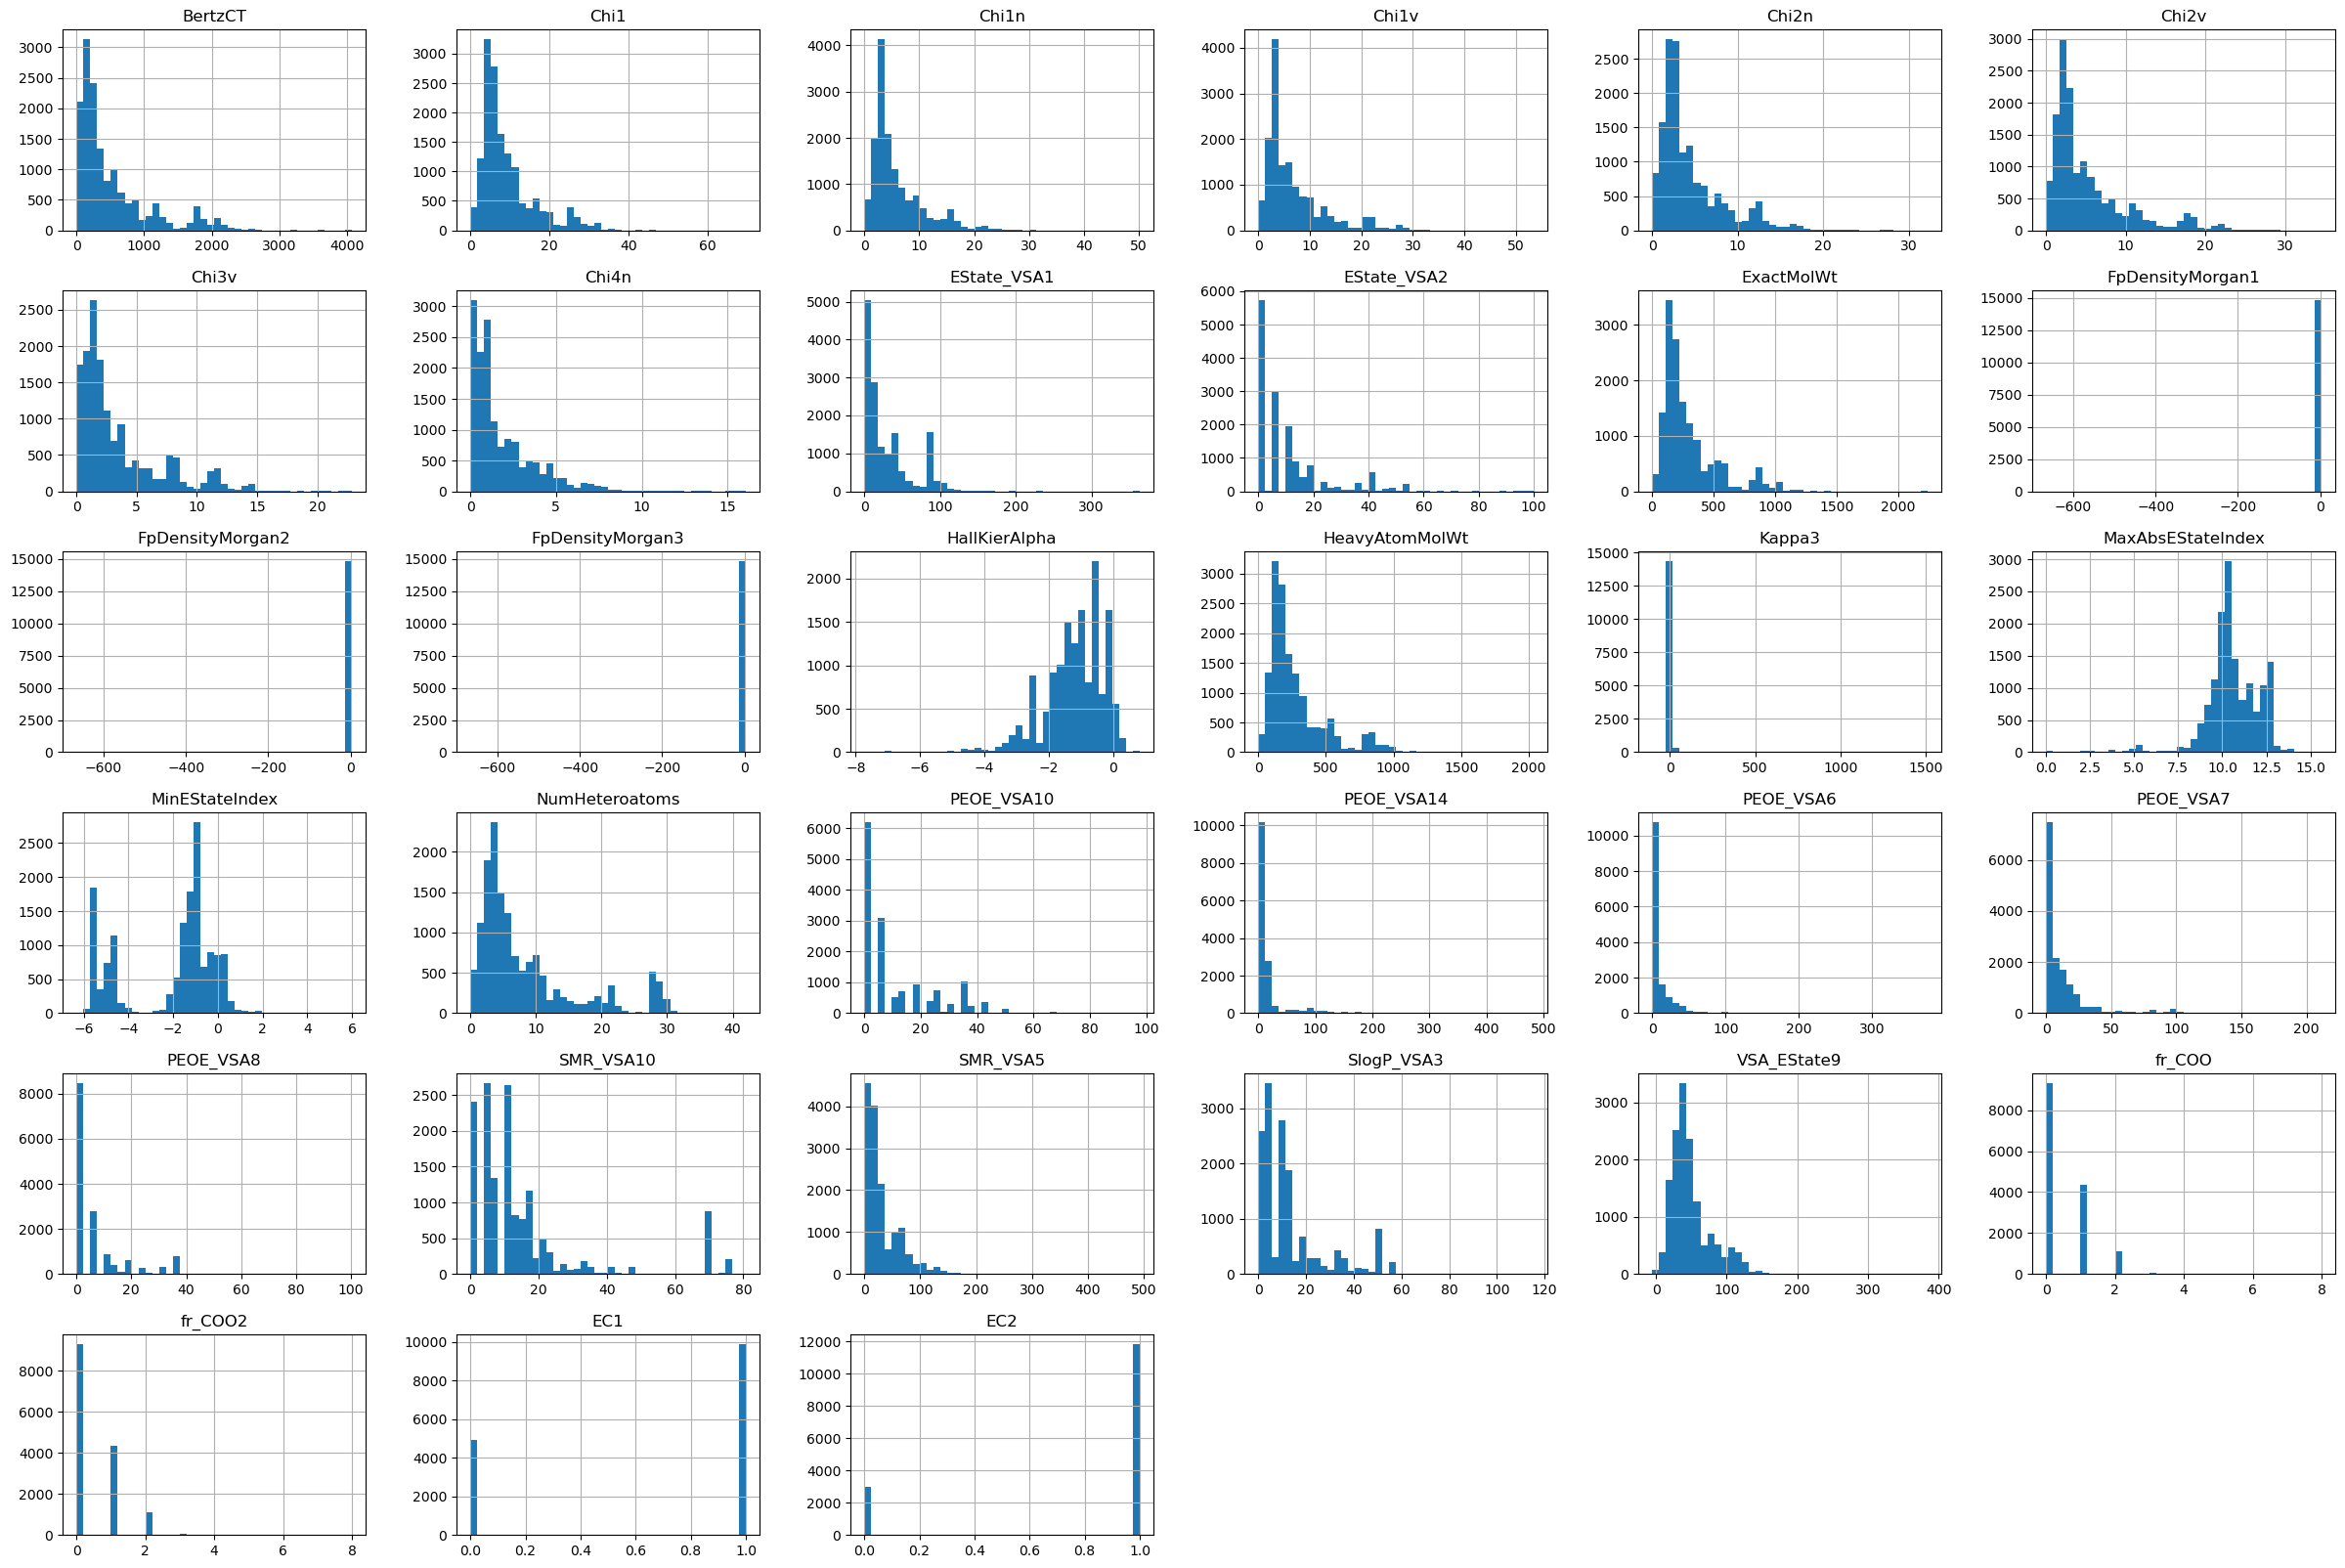

In [9]:
df.hist(figsize=(30, 20), bins=40)
plt.show()

In [10]:
X = df.iloc[:,:-3]
y = df.iloc[:,-2:]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [11]:
X_train

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO
11189,406.268445,8.092224,5.985559,7.483456,4.446582,5.526832,2.825005,1.659511,42.395693,6.420822,308.074347,1.333333,1.888889,2.555556,-1.59,295.079,4.070238,11.129428,-1.233461,10,12.331868,11.938611,0.000000,6.420822,6.420822,47.325300,24.856656,14.383612,53.083333,2
12711,144.583377,5.574586,3.431698,3.431698,2.574280,2.574280,1.542155,0.665697,24.281204,12.841643,178.047738,1.000000,1.666667,2.111111,-1.39,168.060,5.482230,10.664907,-1.221389,6,12.207933,11.938611,0.000000,0.000000,0.000000,11.938611,24.415866,9.589074,44.500000,1
4325,139.111337,4.454507,2.355462,2.355462,1.631522,1.631522,0.887198,0.283731,26.502851,0.000000,146.021523,1.714286,2.142857,2.142857,-0.46,140.050,5.959287,9.896806,-4.571373,7,6.103966,13.792002,0.000000,0.000000,0.000000,13.792002,6.103966,13.883333,33.137269,1
3219,389.884363,6.092224,3.171013,3.171013,2.719449,2.719449,1.557204,0.572905,0.000000,6.420822,178.047738,1.500000,2.333333,2.833333,-1.97,168.060,1.445818,9.931103,-0.710648,5,0.000000,0.000000,0.000000,6.420822,12.263211,16.872230,25.304306,4.794537,33.666667,0
7441,25.261125,2.642734,1.595439,1.595439,0.886443,0.886443,0.180840,0.000000,12.011146,0.000000,45.057849,1.812500,2.250000,2.375000,-0.90,38.029,1.470000,9.993880,-4.914179,4,0.000000,50.712056,0.000000,0.000000,6.544756,11.752550,0.000000,9.589074,28.623565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,150.255712,4.538511,3.946379,3.946379,2.272429,2.272429,1.222365,0.671209,0.000000,5.749512,130.121846,1.500000,2.083333,2.416667,-1.77,116.083,1.402946,9.368056,0.226158,1,5.749512,0.000000,18.199101,24.265468,6.420822,0.000000,6.420822,6.420822,30.166667,0
13418,444.876401,5.609061,3.946379,3.946379,2.820365,2.820365,1.709859,1.084291,0.000000,11.499024,174.111676,1.200000,1.800000,2.400000,-1.10,164.123,1.581759,10.860741,-0.031250,2,12.207933,0.000000,12.132734,17.696186,0.000000,0.000000,12.207933,0.000000,36.666667,0
5390,363.558642,9.272963,4.267026,5.797322,3.381003,4.640534,2.936500,1.409707,46.323497,0.000000,291.033030,1.000000,1.555556,2.000000,-1.15,277.153,7.586611,10.243734,-4.471134,13,0.000000,107.184409,0.000000,0.000000,0.000000,20.767139,12.207933,23.086269,31.294129,0
860,126.490225,4.715214,3.281314,3.281314,2.438992,2.438992,1.634858,0.533757,0.000000,5.907180,117.078979,1.900000,2.333333,3.111111,-0.57,106.060,7.880000,10.749537,-0.883426,3,0.000000,45.534406,19.765380,0.000000,0.000000,6.410095,25.304306,4.794537,30.000000,0


In [12]:
scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
## Turning Data into a tensorflow tensor
X_train_scaled = tf.constant(X_train_scaled)
X_test_scaled = tf.constant(X_test_scaled)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [15]:
inputDim = X_train_scaled.shape[1]

In [16]:
y_train1 = y_train[:,0]
y_train2 = y_train[:,1]
y_test1 = y_test[:,0]
y_test2 = y_test[:,1]

In [17]:
model = Sequential(
    [
        layers.InputLayer(input_shape=inputDim),
        #layers.Dense(units=inputDim, activation='leaky_relu'),
        layers.Dense(inputDim, activation='tanh'),
        
        layers.Dense(1, activation='sigmoid', name='output1')
    ])

shared_layers = model.layers[:-1]

output2_branch = layers.Dense(1, activation='sigmoid', name='output2')(shared_layers[-1].output)

combined_model = models.Model(inputs=model.inputs, outputs=[model.output, output2_branch])

combined_model.compile(optimizer='sgd', loss={'output1': 'binary_crossentropy', 'output2': 'binary_crossentropy'}, metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 output1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [20]:
combined_model.fit(X_train_scaled, [y_train1, y_train2], epochs= 40, batch_size=15, validation_split=0.1, callbacks=[early_stop])

Epoch 1/40
624/624 [==============================] - 3s 3ms/step - loss: 1.1769 - output1_loss: 0.6213 - output2_loss: 0.5556 - output1_accuracy: 0.6598 - output2_accuracy: 0.7565 - val_loss: 1.1416 - val_output1_loss: 0.5959 - val_output2_loss: 0.5457 - val_output1_accuracy: 0.6776 - val_output2_accuracy: 0.7690
Epoch 2/40
624/624 [==============================] - 1s 2ms/step - loss: 1.0915 - output1_loss: 0.5885 - output2_loss: 0.5030 - output1_accuracy: 0.6941 - output2_accuracy: 0.7992 - val_loss: 1.1322 - val_output1_loss: 0.5889 - val_output2_loss: 0.5432 - val_output1_accuracy: 0.6968 - val_output2_accuracy: 0.7690
Epoch 3/40
624/624 [==============================] - 1s 2ms/step - loss: 1.0834 - output1_loss: 0.5838 - output2_loss: 0.4996 - output1_accuracy: 0.6980 - output2_accuracy: 0.7992 - val_loss: 1.1314 - val_output1_loss: 0.5883 - val_output2_loss: 0.5431 - val_output1_accuracy: 0.6987 - val_output2_accuracy: 0.7690
Epoch 4/40
624/624 [==============================] 

In [21]:
evaluation = combined_model.evaluate(X_test_scaled, {'output1': y_test1, 'output2': y_test2})

print("Evaluation results for output1:")
print("Loss:", evaluation[0])  
print("Metrics:", evaluation[1:])

print("\nEvaluation results for output2:")
print("Loss:", evaluation[2])
print("Metrics:", evaluation[3:])


140/140 [==============================] - 0s 2ms/step - loss: 1.0727 - output1_loss: 0.5827 - output2_loss: 0.4900 - output1_accuracy: 0.6952 - output2_accuracy: 0.8055
Evaluation results for output1:
Loss: 1.0727449655532837
Metrics: [0.5827426314353943, 0.4900027811527252, 0.6951931715011597, 0.8054806590080261]

Evaluation results for output2:
Loss: 0.4900027811527252
Metrics: [0.6951931715011597, 0.8054806590080261]


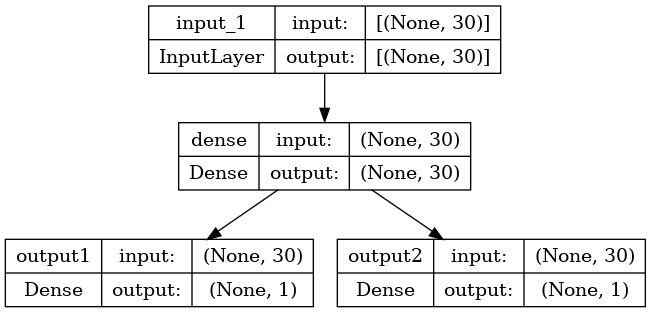

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(combined_model, show_shapes=True, show_layer_names=True)
